# Load in Appropriate Libraries

In [129]:
import numpy as np
import matplotlib.pylab as plt
import PIL
import scipy
from scipy import ndimage

# Load in 'mri.jpg'

In [130]:
mri = PIL.Image.open('mri.jpg')
#let's add noise just because I can
mri = mri + np.random.rand(256,256)*5 #add random noise std.dev 5

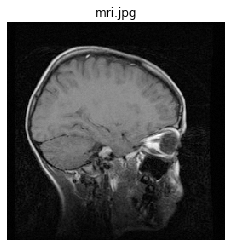

In [131]:
plt.xlabel('Caudal - Rostral')
plt.ylabel('Anterior - Posterior')
plt.title('mri.jpg')
plt.axis('off')
plt.imshow(mri, cmap='gray', vmin=0, vmax=255) #this command actually displays the image

In [132]:
pix = np.asarray(mri)
pix.shape

(256, 256)

# applying filters
## average filters (aka uniform filter)

In [133]:
mri_3av = ndimage.uniform_filter(pix, size=3)
mri_5av = ndimage.uniform_filter(pix, size=5)
mri_9av = ndimage.uniform_filter(pix, size=9)

(-0.5, 255.5, 255.5, -0.5)

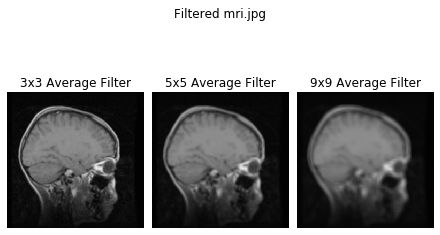

In [134]:
fig, axs = plt.subplots(1,3, constrained_layout=True)

axs[0].imshow(mri_3av, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('3x3 Average Filter')
fig.suptitle('Filtered mri.jpg')
axs[0].axis('off')

axs[1].imshow(mri_5av, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('5x5 Average Filter')
axs[1].axis('off')

axs[2].imshow(mri_9av, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('9x9 Average Filter')
axs[2].axis('off')

## gaussian low pass filters

In [135]:
mri_17g = ndimage.gaussian_filter(pix, sigma=1.7)
mri_5g = ndimage.gaussian_filter(pix, sigma=5)

(-0.5, 255.5, 255.5, -0.5)

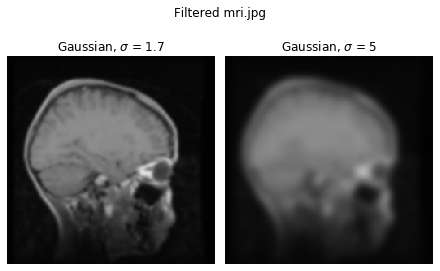

In [136]:
fig, axs = plt.subplots(1,2, constrained_layout=True)

axs[0].imshow(mri_17g, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Gaussian, $\sigma$ = 1.7')
fig.suptitle('Filtered mri.jpg')
axs[0].axis('off')

axs[1].imshow(mri_5g, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Gaussian, $\sigma$ = 5')
axs[1].axis('off')

## take image into frequency domain

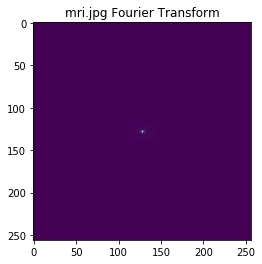

In [137]:
f_mri = np.fft.fft2(pix)
f_mri = np.fft.fftshift(f_mri)

plt.title('mri.jpg Fourier Transform')
plt.axis()
plt.imshow(abs(f_mri))

I am unsure how to have it displayed better.  Maybe taking log?

In [138]:
def rad_filt(image, rad):
    length, width = image.size
    radius = rad*length

    cir_filt = np.zeros((length, width))

    x = range(length)
    y = range(width)

    for i in x:
        for j in y:
            dist = np.sqrt((i - np.floor(length/2))**2 + (j - np.floor(width/2))**2)
            if dist < radius:
                cir_filt[i,j] = 255
            else:
                cir_filt[i,j] = 0
                    
    plt.imshow(cir_filt)
    plt.title(str(rad) + '*length')
    plt.show()
    return(cir_filt)

In [139]:
rad_01 = rad_filt(mri, 0.1)
rad_003 = rad_filt(mri, 0.03)
rad_005 = rad_filt(mri, 0.05)

TypeError: cannot unpack non-iterable int object

### apply radial filter

In [ ]:
f_mri_r01 = np.multiply(f_mri,rad_01)
f_mri_r003 = np.multiply(f_mri, rad_003)
f_mri_r005 = np.multiply(f_mri, rad_005)

### go back to spatial domain

In [ ]:
mri_r01 = np.fft.ifft2(f_mri_r01)
mri_r003 = np.fft.ifft2(f_mri_r003)
mri_r005 = np.fft.ifft2(f_mri_r005)

In [ ]:
fig, axs = plt.subplots(1,3, constrained_layout=True)

axs[0].imshow(abs(mri_r01), cmap='gray')
axs[0].set_title('0.1*length')
fig.suptitle('Filtered mri.jpg')
axs[0].axis('off')

axs[1].imshow(abs(mri_r003), cmap='gray')
axs[1].set_title('0.03*length')
axs[1].axis('off')

axs[2].imshow(abs(mri_r005), cmap='gray')
axs[2].set_title('0.05*length')
axs[2].axis('off')